# P-values in GWAS

In [95]:
using Distributions
using DataFrames
using GLM
using Plots
using StatsPlots
using Printf

## 2.1 What is P-value?

In [227]:
n = 100
f = 0.30 # MAF
x = rand(Binomial(2, f), n) # example genotypes for n individuals
y = randn(n) # outcome that is independent of x
lm_fit = lm(@formula(y ~ x), DataFrame("x"=>x, "y"=>y, copycols=false))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.208569     0.144883  1.44    0.1532  -0.0789469   0.496085
x            0.0304865    0.15903   0.19    0.8484  -0.285103    0.346076
─────────────────────────────────────────────────────────────────────────

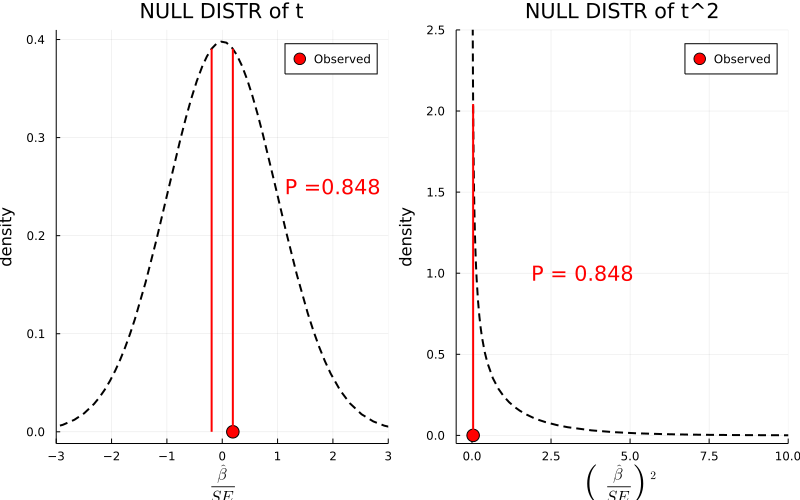

In [228]:
p = plot(layout=(1, 2), size=(800, 500)) # draw two panel on the grid with 1 row and 2 cols

coef_values = coeftable(lm_fit)
t_stat = coef_values.cols[coef_values.teststatcol][coef_values.rownms.=="x"][1] # Extract t-value for variable 'x'
p_val = coef_values.cols[coef_values.pvalcol][coef_values.rownms.=="x"][1]

#1 on t-statistic's scale
# x_grid = range(-3.0, +3.0, 0.05) # we need to define the plotting regio
plot!(p, TDist(n-2), label=nothing, lw=2, ls=:dash, lc=:black,
    xaxis=("\$\\frac{\\hat{\\beta}}{SE}\$", (-3, +3)),
    yaxis=("density")
)
scatter!(p, [t_stat], [0], color=:red, markersize=7, label="Observed")
plot!(p, t_stat * [1, 1], [0, pdf(TDist(n-2), t_stat)], lw=2, lc=:red, label=nothing)
plot!(p, -t_stat * [1, 1], [0, pdf(TDist(n-2), t_stat)], lw=2, lc=:red, label=nothing)
annotate!(2.0, 0.25, text(@sprintf("P =%.3f", p_val), :red), subplot=1)
title!(p, "NULL DISTR of t")

#2nd of t^2 statistics
plot!(p, Chisq(1), label=nothing, lw=2, ls=:dash, lc=:black,
    xaxis=("\$\\left(\\frac{\\hat{\\beta}}{SE}\\right)^2\$", (-0.5, 10)),
    yaxis=("density", (-0.05, 2.5)),
    subplot=2
)
scatter!(p, [t_stat^2], [0], color=:red, markersize=7, label="Observed", subplot=2)
plot!(p, t_stat^2 * [1, 1], [0, pdf(Chisq(1), t_stat^2)], lw=2, lc=:red, label=nothing, subplot=2)
annotate!(3.5, 1, text(@sprintf("P = %.3f", p_val), :red), subplot=2)
title!(p, "NULL DISTR of t^2", subplot=2)

In [229]:
z = t_stat # t-statistic is also called z-score under Normal approximation
cdf(Normal(), -abs(z)) + ccdf(Normal(), abs(z))

0.847975056919258

In [230]:
ccdf(Chisq(1), t_stat^2)

0.847975056919258